In [2]:
# Importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the train dataset to pandas dataframe
train_set = pd.read_csv(r'C:\Users\sasi\Downloads\house-prices-advanced-regression-techniques\train.csv',encoding = 'utf-8')

In [4]:
# Displaying the first five rows using .head() method
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Checking the shape of the train dataset
train_set.shape

(1460, 81)

In [7]:
# Displaying the statistical values of the train dataset
train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Loading the test dataset
test_set = pd.read_csv(r'C:\Users\sasi\Downloads\house-prices-advanced-regression-techniques\test.csv',encoding = 'utf-8')

In [9]:
# Displaying the shape of the test dataset
test_set.shape

(1459, 80)

In [165]:
# Concatenating the train and test dataset
overall_set = pd.concat([train_set,test_set],sort = True)

# Data Wrangling

# Dropping Columns which have morethan 50% Missing Values

In [11]:


overall_set.drop(['Alley'],axis=1,inplace=True)
overall_set.drop(['Fence'],axis=1,inplace=True)
overall_set.drop(['FireplaceQu'],axis=1,inplace=True)
overall_set.drop(['MiscFeature'],axis=1,inplace=True)
overall_set.drop(['PoolQC'],axis=1,inplace=True)


# Filling the missing values with Mean/Median/Mode according to the varaible type

In [12]:
overall_set['BsmtCond'] = overall_set['BsmtCond'].fillna(overall_set['BsmtCond'].mode()[0])
overall_set['BsmtExposure'] = overall_set['BsmtExposure'].fillna(overall_set['BsmtExposure'].mode()[0])
overall_set['BsmtFinType1'] = overall_set['BsmtFinType1'].fillna(overall_set['BsmtFinType1'].mode()[0])
overall_set['BsmtFinType2'] = overall_set['BsmtFinType2'].fillna(overall_set['BsmtFinType2'].mode()[0])
overall_set['BsmtQual'] = overall_set['BsmtQual'].fillna(overall_set['BsmtQual'].mode()[0])
overall_set['GarageCond'] = overall_set['GarageCond'].fillna(overall_set['GarageCond'].mode()[0])
overall_set['GarageFinish'] = overall_set['GarageFinish'].fillna(overall_set['GarageFinish'].mode()[0])
overall_set['GarageQual'] = overall_set['GarageQual'].fillna(overall_set['GarageQual'].mode()[0])
overall_set['GarageType'] = overall_set['GarageType'].fillna(overall_set['GarageType'].mode()[0])
overall_set['GarageYrBlt'] = overall_set['GarageYrBlt'].fillna(overall_set['GarageYrBlt'].mode()[0])
overall_set['Utilities'] = overall_set['Utilities'].fillna(overall_set['Utilities'].mode()[0])
overall_set['MasVnrType'] = overall_set['MasVnrType'].fillna(overall_set['MasVnrType'].mode()[0])
overall_set['MSZoning'] = overall_set['MSZoning'].fillna(overall_set['MSZoning'].mode()[0])
overall_set['Functional'] = overall_set['Functional'].fillna(overall_set['Functional'].mode()[0])
overall_set['BsmtFullBath'] = overall_set['BsmtFullBath'].fillna(overall_set['BsmtFullBath'].mode()[0])
overall_set['BsmtHalfBath'] = overall_set['BsmtHalfBath'].fillna(overall_set['BsmtHalfBath'].mode()[0])
overall_set['GarageCars'] = overall_set['GarageCars'].fillna(overall_set['GarageCars'].mode()[0])
overall_set['Electrical'] = overall_set['Electrical'].fillna(overall_set['Electrical'].mode()[0])
overall_set['Exterior1st'] = overall_set['Exterior1st'].fillna(overall_set['Exterior1st'].mode()[0])
overall_set['Exterior2nd'] = overall_set['Exterior2nd'].fillna(overall_set['Exterior2nd'].mode()[0])
overall_set['KitchenQual'] = overall_set['KitchenQual'].fillna(overall_set['KitchenQual'].mode()[0])
overall_set['SaleType'] = overall_set['SaleType'].fillna(overall_set['SaleType'].mode()[0])
overall_set['LotFrontage'] = overall_set['LotFrontage'].fillna(overall_set['LotFrontage'].mean())
overall_set['MasVnrArea'] = overall_set['MasVnrArea'].fillna(overall_set['MasVnrArea'].mean())
overall_set['TotalBsmtSF'] = overall_set['TotalBsmtSF'].fillna(overall_set['TotalBsmtSF'].mean())
overall_set['BsmtFinSF1'] = overall_set['BsmtFinSF1'].fillna(overall_set['BsmtFinSF1'].mean())
overall_set['BsmtFinSF2'] = overall_set['BsmtFinSF2'].fillna(overall_set['BsmtFinSF2'].mean())
overall_set['BsmtUnfSF'] = overall_set['BsmtUnfSF'].fillna(overall_set['BsmtUnfSF'].mean())
overall_set['GarageArea'] = overall_set['GarageArea'].fillna(overall_set['GarageArea'].mean())

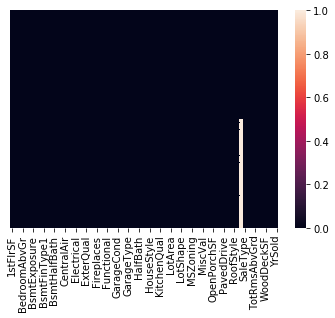

In [13]:
# Displaying the heat map to check for the missing values 
sns.heatmap(overall_set.isnull(),yticklabels = False)

In [14]:
# Creating features from the dataset
overall_set['TotalArea'] = overall_set['TotalBsmtSF'] + overall_set['1stFlrSF'] + overall_set['2ndFlrSF'] + overall_set['GrLivArea'] + overall_set['GarageArea']
overall_set['Bathrooms'] = overall_set['FullBath'] + overall_set['HalfBath']*0.5 
overall_set['Year average']= (overall_set['YearRemodAdd']+overall_set['YearBuilt'])/2

In [15]:
# Correalation of the columns
sub = overall_set.select_dtypes(exclude='object')
sub_corr = sub.corr()

In [16]:
overall_set.shape

(2919, 79)

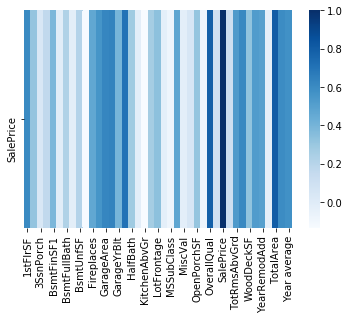

In [17]:
# Heatmap of correlation with target variable Price column
sns.heatmap(sub_corr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Blues')

In [18]:
# Splitting the concatenated dataset to train and test dataset
c_train_set = overall_set[0:1459]

In [19]:
c_train_set = overall_set.iloc[:1460,:]
c_test_set = overall_set.iloc[1460:,:]

In [20]:
c_train_set.shape

(1460, 79)

In [21]:
c_test_set.shape

(1459, 79)

In [22]:
# Performing analysis on train dataset

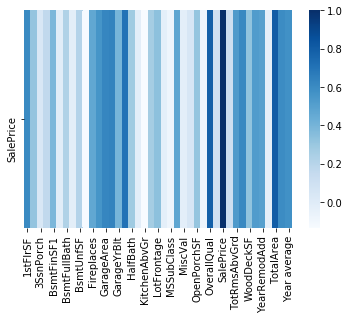

In [23]:
c_train_set_cor = (c_train_set.select_dtypes(exclude='object')).corr()
sns.heatmap(c_train_set_cor.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Blues')

In [24]:
Num=c_train_set_cor

In [142]:
c_train_set_cor

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalArea,Bathrooms,Year average
1stFlrSF,1.000000,-0.202646,0.056104,0.127401,0.445863,0.097117,0.244671,0.001956,0.317987,-0.065292,0.410531,0.380637,0.489782,0.439317,0.182240,0.566024,-0.119916,0.010496,0.068101,0.299475,0.413931,-0.014241,-0.251758,0.342132,-0.021096,0.031372,0.211671,-0.144203,0.476224,0.131525,0.605852,0.088758,0.409516,0.819530,0.235459,0.281986,0.240379,-0.013604,0.739191,0.282300,0.295715
2ndFlrSF,-0.202646,1.000000,-0.024358,0.502901,-0.137079,-0.099260,-0.169494,-0.023855,0.004469,0.061989,0.194561,0.421378,0.138347,0.183926,0.052291,0.687501,0.609707,0.005590,0.059306,0.050986,0.072418,0.063353,0.307886,0.174018,0.016197,0.035164,0.208026,0.028942,0.295493,0.081487,0.319334,0.040606,0.616423,-0.174512,0.092165,0.010308,0.140024,-0.028700,0.469035,0.606039,0.070249
3SsnPorch,0.056104,-0.024358,1.000000,-0.024478,0.026451,-0.029993,-0.000106,0.035114,0.020764,-0.037305,0.011257,0.035353,0.035087,0.035765,0.015905,0.020643,-0.004972,-0.046635,-0.024600,0.020423,0.062061,-0.004296,-0.043825,0.018800,0.000354,0.029474,-0.005842,0.025504,0.030371,-0.007992,0.044584,-0.031436,-0.006683,0.037384,-0.032771,0.031355,0.045286,0.018645,0.031949,0.028657,0.041286
BedroomAbvGr,0.127401,0.502901,-0.024478,1.000000,-0.107355,-0.015728,-0.150673,0.046519,0.166643,0.041570,0.107570,0.363252,0.065253,0.086106,-0.056782,0.521270,0.226651,0.037719,0.198597,0.119690,0.236901,0.105607,-0.023438,0.102424,0.007767,0.046544,0.093810,0.012980,0.101676,0.070703,0.168213,0.044300,0.676620,0.050450,0.046854,-0.070651,-0.040581,-0.036014,0.403686,0.404253,-0.065193
BsmtFinSF1,0.445863,-0.137079,0.026451,-0.107355,1.000000,-0.050117,0.649212,0.067418,-0.495251,-0.102303,0.260011,0.058543,0.296970,0.224054,0.119267,0.208171,0.004262,-0.005024,-0.081007,0.214103,0.214800,-0.064503,-0.069836,0.263552,0.003571,-0.015727,0.111761,-0.046231,0.239666,0.140491,0.386420,0.062021,0.044316,0.522396,0.204306,0.249503,0.128451,0.014359,0.358911,0.052395,0.223497
BsmtFinSF2,0.097117,-0.099260,-0.029993,-0.015728,-0.050117,1.000000,0.158678,0.070948,-0.209294,0.036543,0.046921,-0.076444,-0.018227,-0.038264,-0.094208,-0.009640,-0.032148,-0.005968,-0.040751,0.111170,0.042720,0.014807,-0.065649,-0.072289,0.004940,-0.015211,0.003093,0.040229,-0.059119,0.041709,-0.011378,0.088871,-0.035227,0.104810,0.067898,-0.049107,-0.067759,0.031706,0.021784,-0.078925,-0.063227
BsmtFullBath,0.244671,-0.169494,-0.000106,-0.150673,0.649212,0.158678,1.000000,-0.147871,-0.422900,-0.049911,0.137928,-0.064512,0.179189,0.131881,0.105716,0.034836,-0.030905,0.002289,-0.041503,0.158155,0.090677,-0.047143,0.003491,0.085026,-0.023047,-0.025361,0.067341,-0.054942,0.111098,0.067616,0.227122,0.023148,-0.053275,0.307351,0.175315,0.187599,0.119470,0.067049,0.147900,-0.068098,0.178412
BsmtHalfBath,0.001956,-0.023855,0.035114,0.046519,0.067418,0.070948,-0.147871,1.000000,-0.095804,-0.008555,0.028976,-0.054536,-0.024536,-0.020891,-0.077945,-0.018918,-0.012340,-0.020155,-0.037944,0.048046,-0.006816,-0.005842,-0.002333,0.026679,-0.007367,0.032873,-0.025324,0.117821,-0.040150,0.020025,-0.016844,0.032121,-0.023836,-0.000315,0.040161,-0.038162,-0.012337,-0.046524,-0.017425,-0.052117,-0.030873
BsmtUnfSF,0.317987,0.004469,0.020764,0.166643,-0.495251,-0.209294,-0.422900,-0.095804,1.000000,-0.002538,0.051575,0.288886,0.183303,0.214175,0.172350,0.240257,-0.041118,-0.007940,0.030086,-0.002618,0.123537,0.028167,-0.140759,0.114181,-0.023837,0.034888,0.129005,-0.136841,0.308159,-0.035092,0.214479,-0.012579,0.250647,0.415360,-0.005316,0.149040,0.181133,-0.041258,0.329586,0.233977,0.180792
EnclosedP

In [25]:
# Correaltion of each column with target varaible Price
Num=c_train_set_cor['SalePrice'].sort_values(ascending=False).to_frame()
Num

,SalePrice
SalePrice,1.000000
TotalArea,0.801018
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
Bathrooms,0.597966
Year average,0.576144


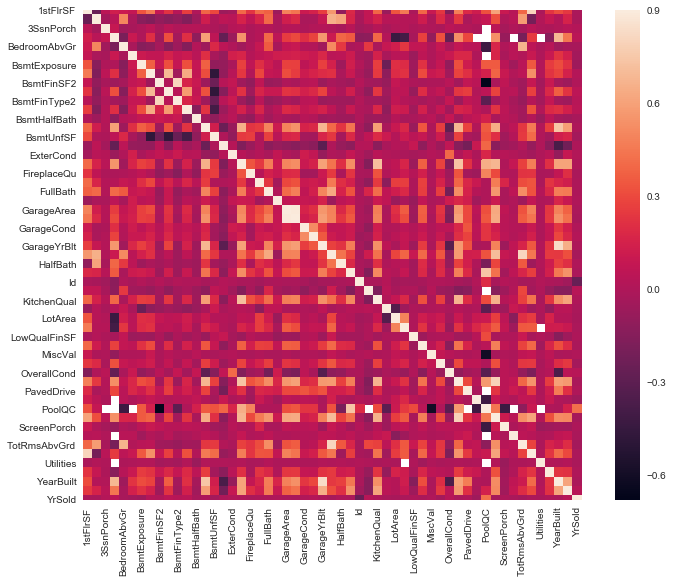

In [199]:
#Correlation map to see how features are correlated with SalePrice
corrmat = overall_set.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [200]:
Categorical_dtypes = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

C:\Users\sasi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


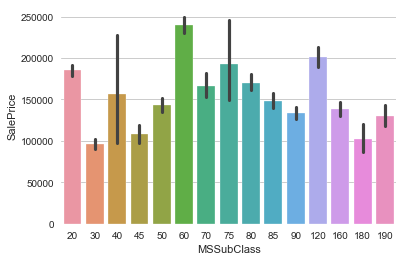

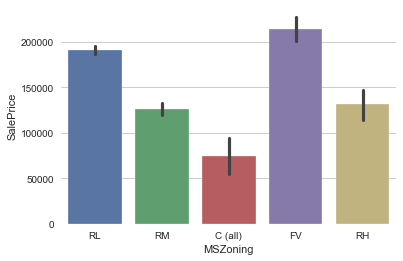

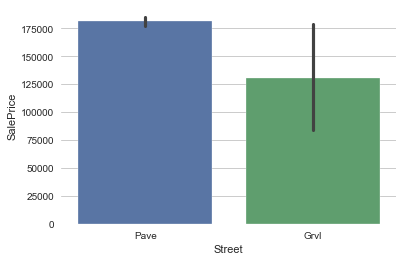

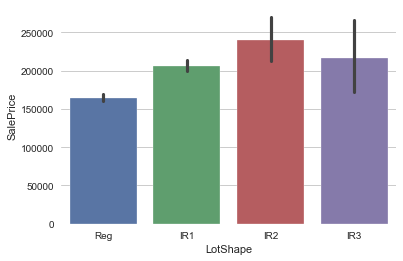

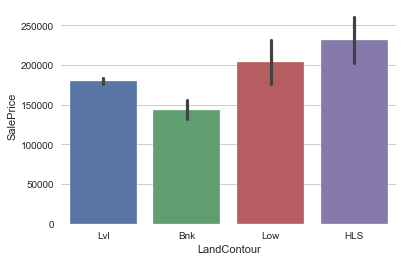

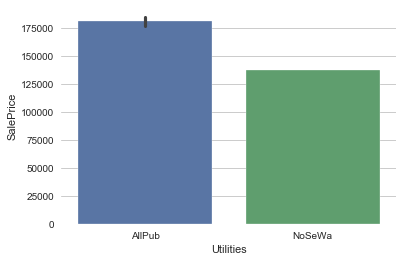

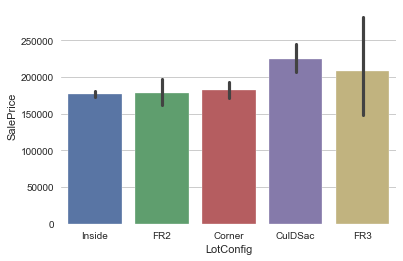

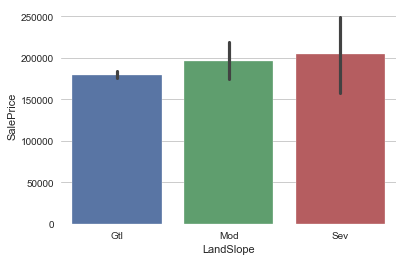

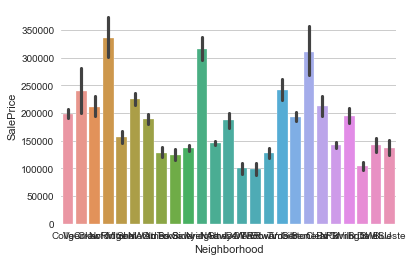

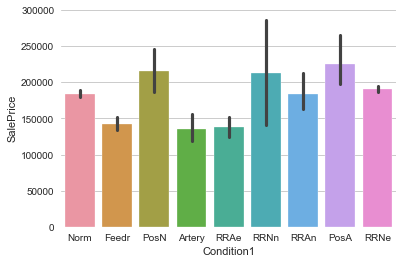

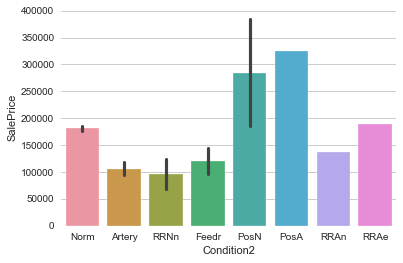

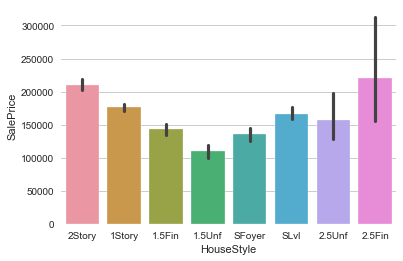

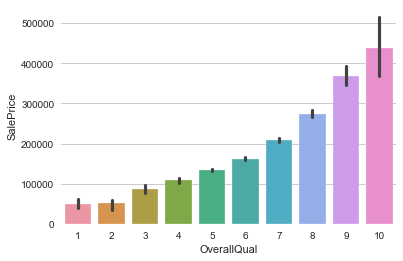

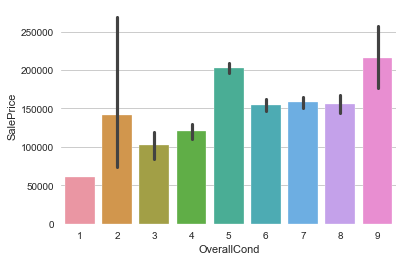

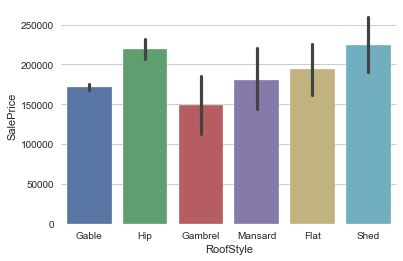

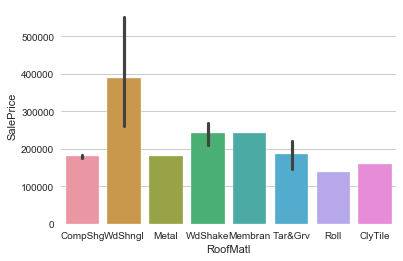

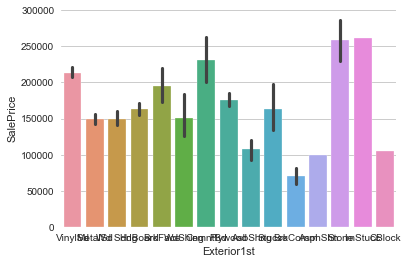

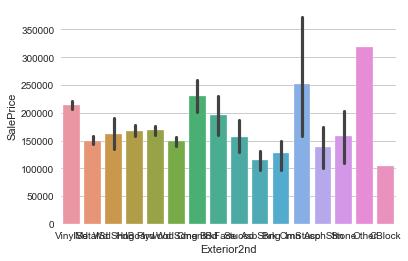

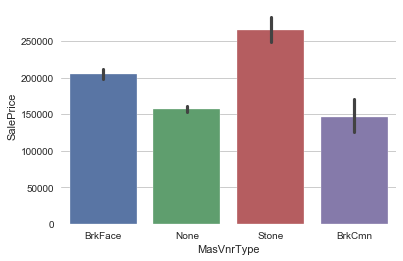

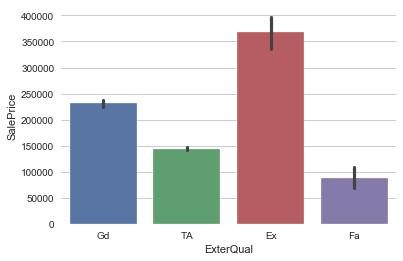

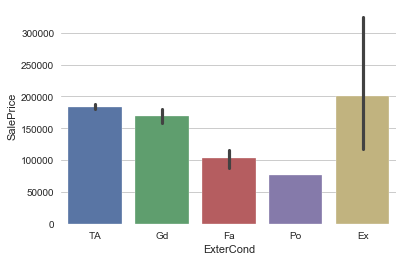

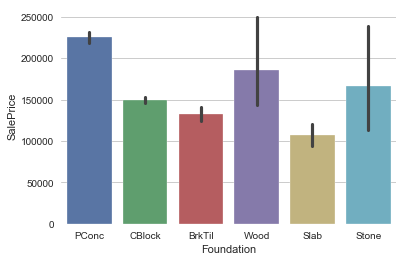

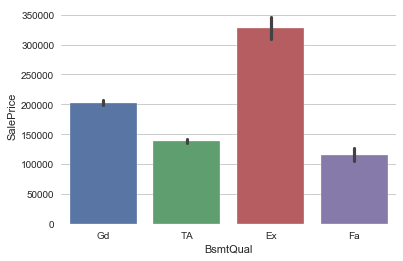

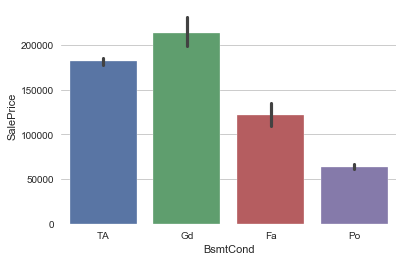

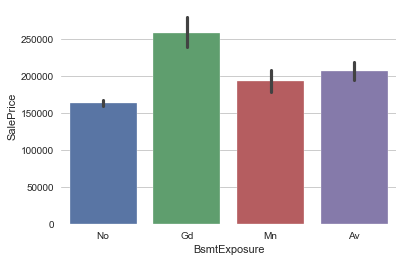

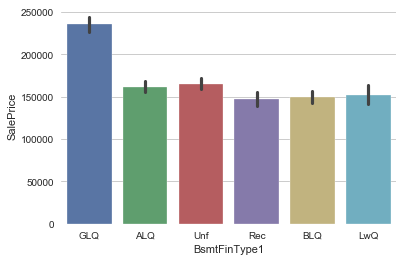

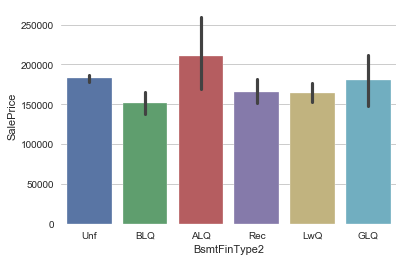

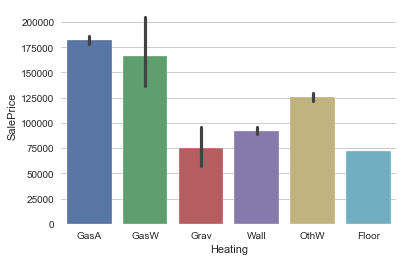

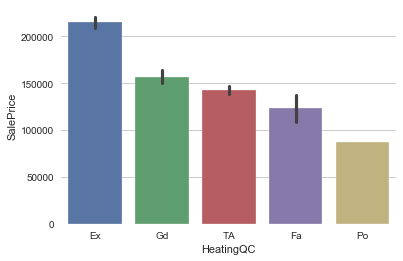

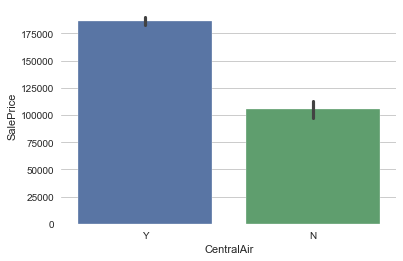

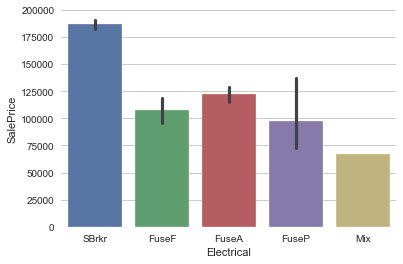

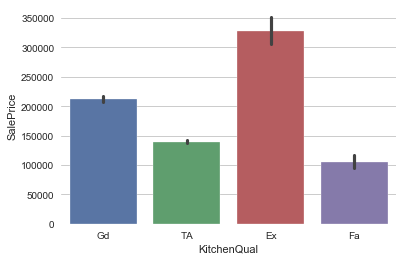

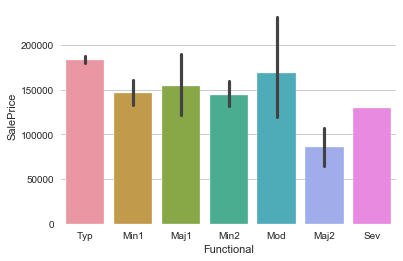

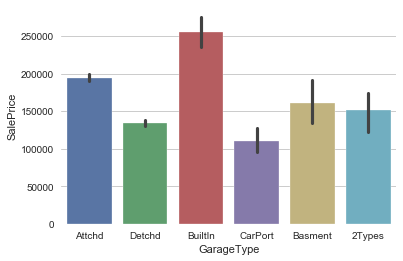

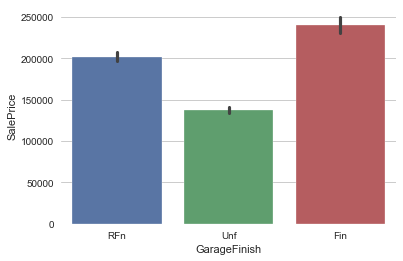

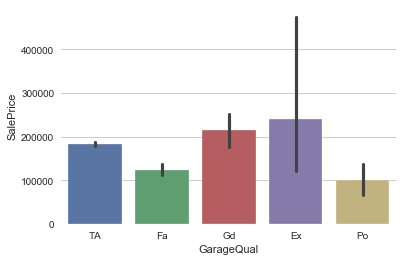

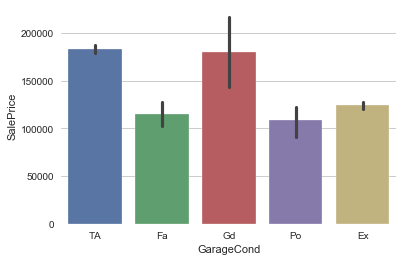

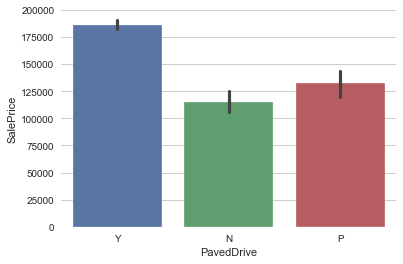

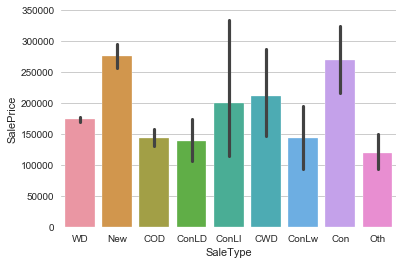

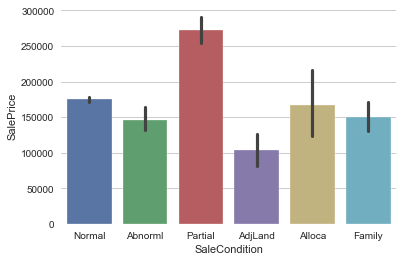

In [204]:
# PLotting the relationship between the categorical features and the target
for col in Categorical_dtypes:
    plt.figure(figsize=(6,4)) 
    sns.barplot(x=c_train_set[col], y=c_train_set['SalePrice'])

In [207]:
#Identifying columns with numerical data
num_cols = [col for col in c_train_set.columns if c_train_set[col].dtypes in ['int64', 'float64']]

C:\Users\sasi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


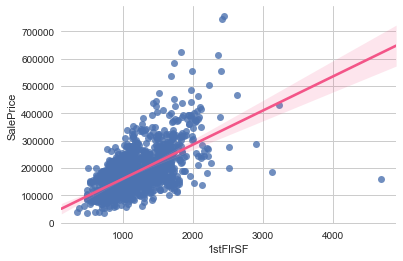

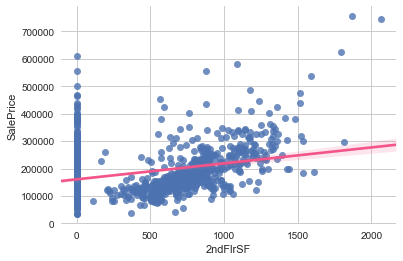

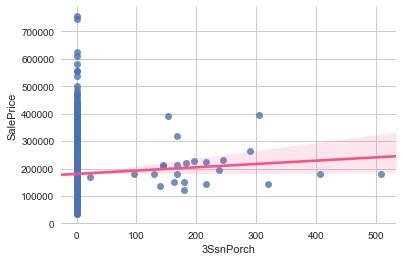

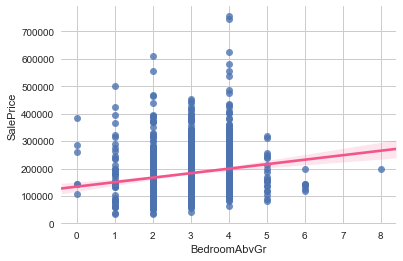

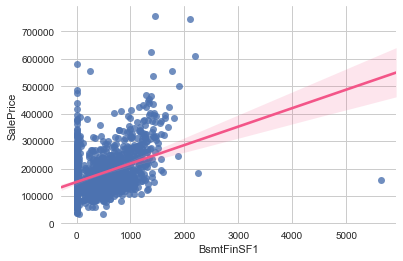

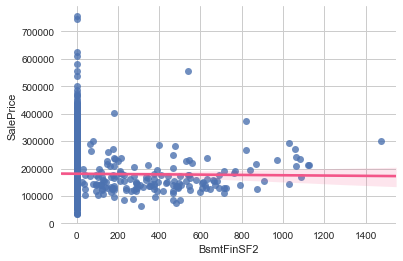

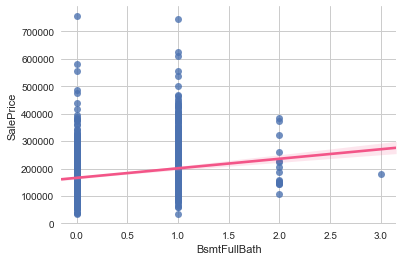

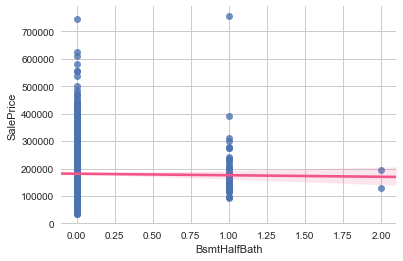

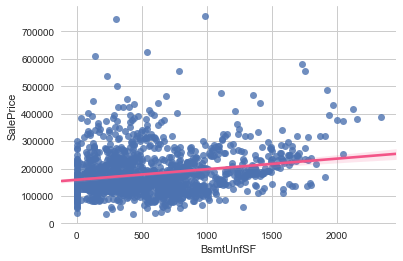

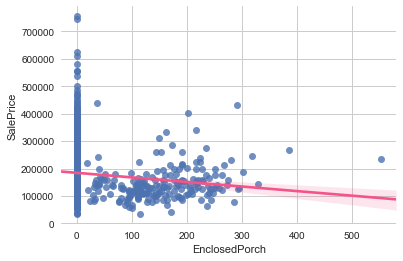

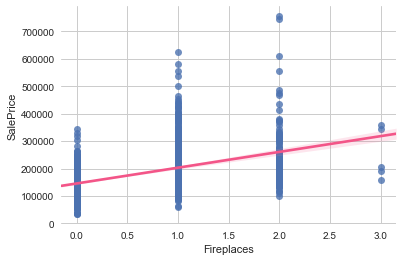

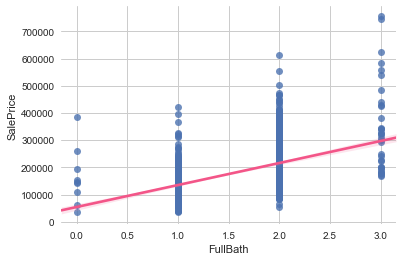

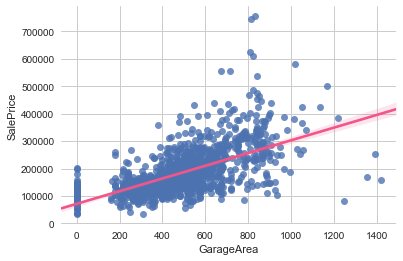

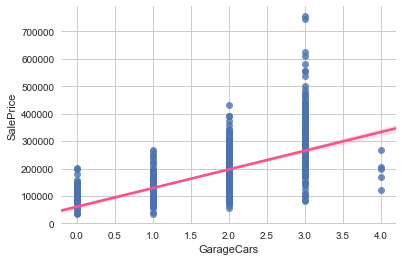

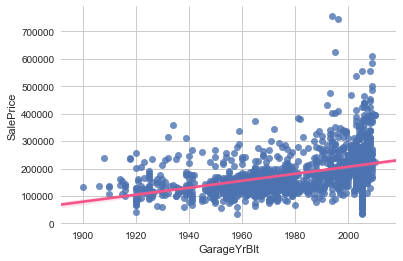

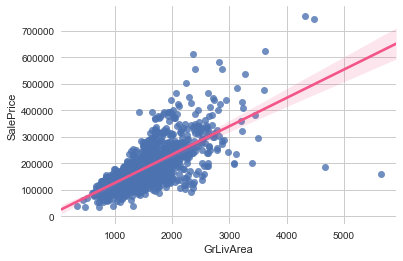

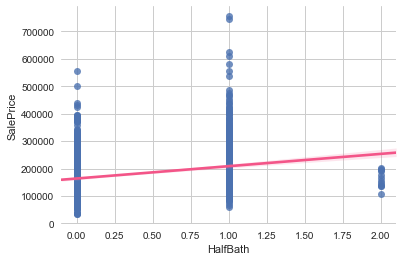

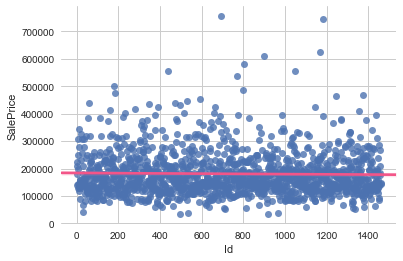

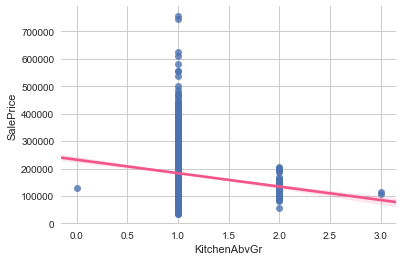

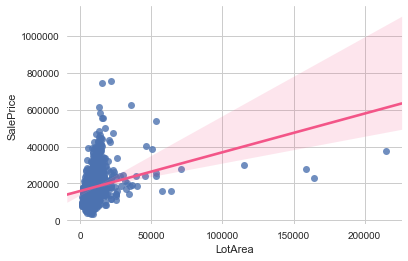

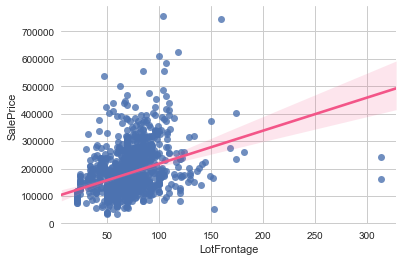

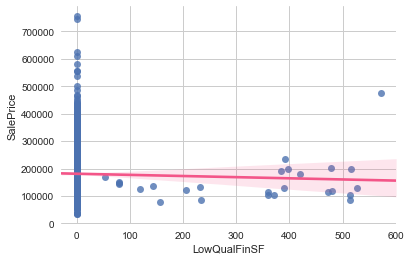

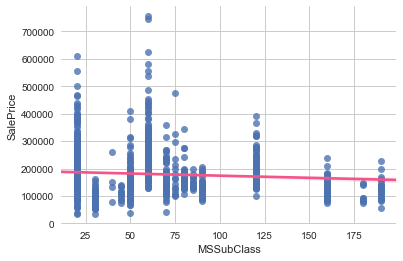

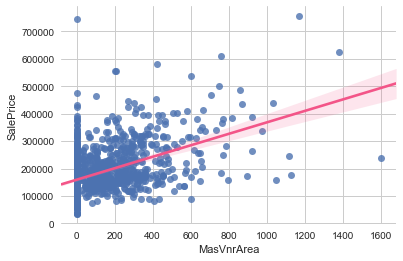

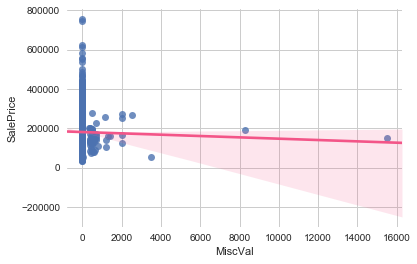

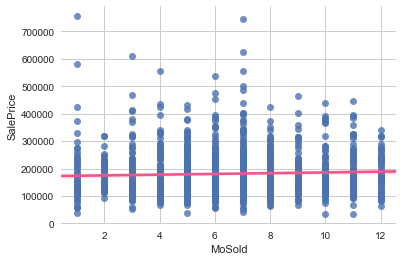

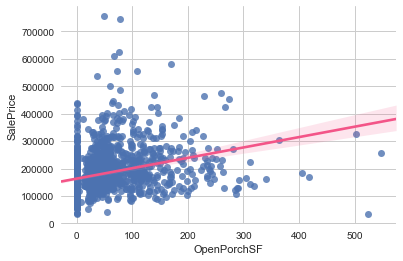

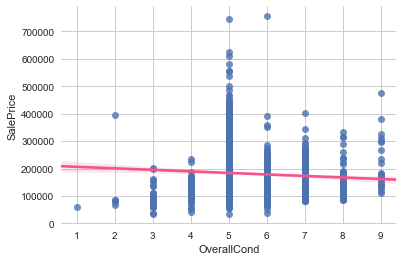

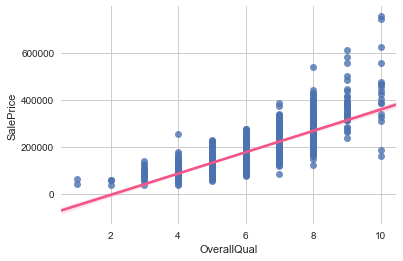

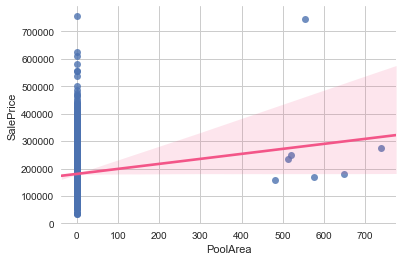

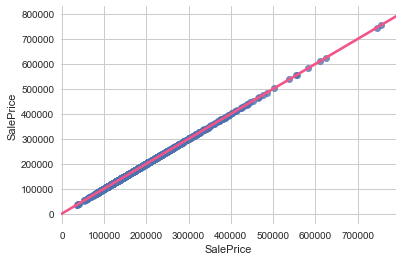

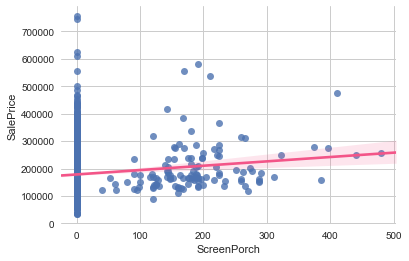

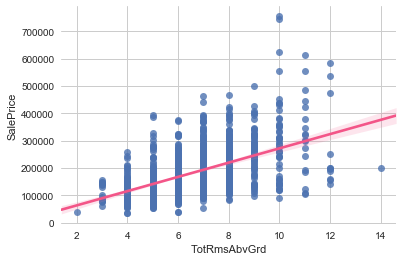

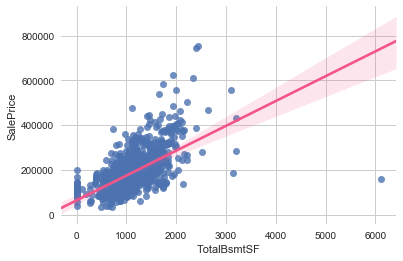

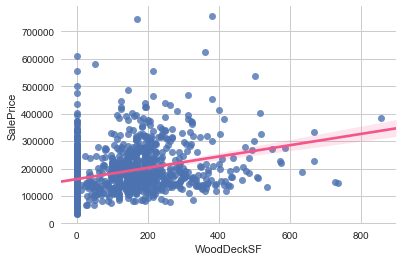

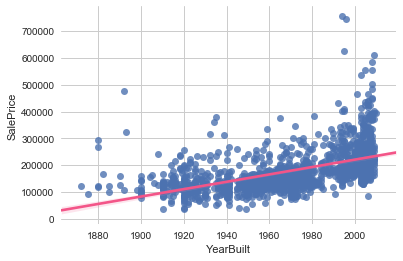

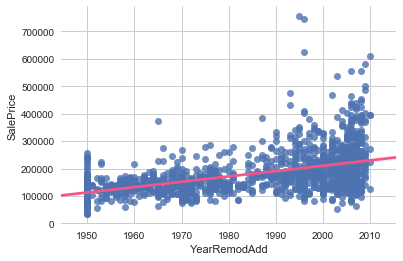

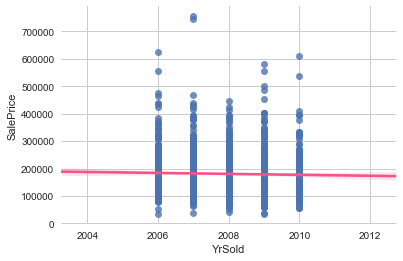

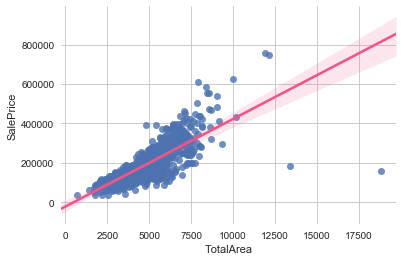

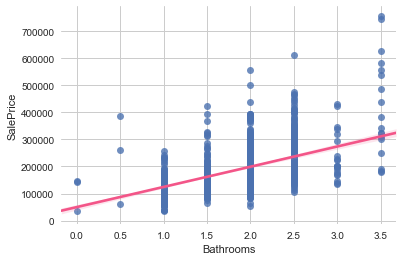

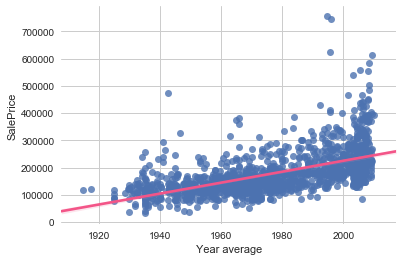

In [210]:
# PLotting the relationship between the numerical features and the target
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.regplot(x=c_train_set[col], y=c_train_set['SalePrice'], line_kws={'color':'#f35588'})

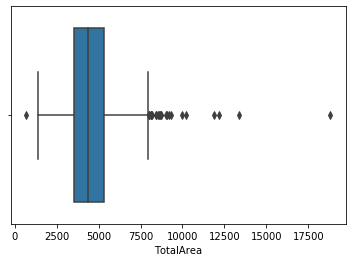

In [27]:
# Box plot to identify outliers in column Total Area
sns.boxplot(c_train_set['TotalArea'])

In [28]:
c_train_set['TotalArea'].describe()

count     1460.000000
mean      4555.492466
std       1433.745228
min        668.000000
25%       3552.000000
50%       4385.500000
75%       5324.500000
max      18812.000000
Name: TotalArea, dtype: float64

In [29]:
std_price = np.std(c_train_set['TotalArea'])
mean_price = np.mean(c_train_set['TotalArea'])
(c_train_set['TotalArea'] > 13* std_price).sum()

1

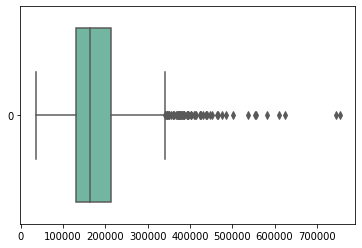

In [30]:
data_boxplot = c_train_set[['SalePrice','TotalArea','OverallQual','Bathrooms']]
sns.boxplot(data=data_boxplot.SalePrice, orient="h", palette="Set2")

In [31]:
data_pairplot = c_train_set[['SalePrice','TotalArea','OverallQual','Bathrooms']]

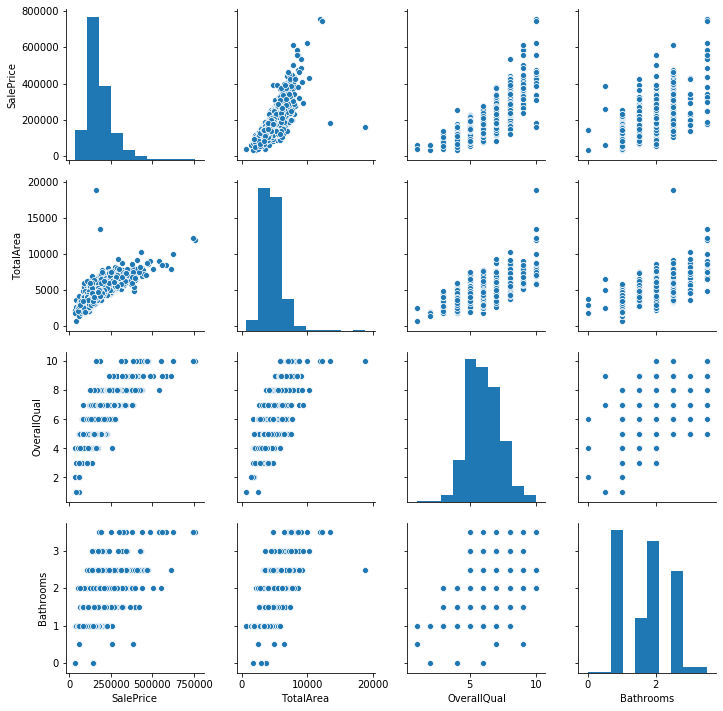

In [32]:
# Plotting pair plot for top 3 high correlated columns with price
sns.pairplot(data_pairplot,kind = 'scatter')

In [33]:
c_train_sp = c_train_set['SalePrice']
c_train_br = c_train_set['Bathrooms']
obs_corr = c_train_sp.corr(c_train_br)

In [34]:
slope_spvsb, intercept_spvsb = np.polyfit(c_train_sp,c_train_br,1)

In [35]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps


In [36]:
bs_slope_reps_spvsb, bs_intercept_reps_spvsb = draw_bs_pairs_linreg(c_train_br,c_train_sp,1000)

In [37]:
np.percentile(bs_intercept_reps_spvsb,(2.5,97.5))

array([38368.48701873, 59588.02375661])

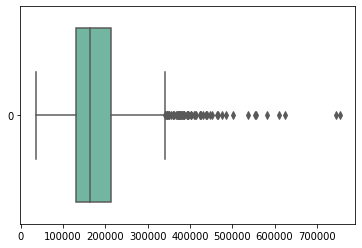

In [40]:
sns.boxplot(data=data_boxplot.SalePrice, orient="h", palette="Set2")

In [41]:
# Function to remove outliers

In [42]:
def remove_outliers(column, data):
    #lets remove outliers from the sqft_lot15 column
    q3 = data[column].quantile(0.75)
    q1 = data[column].quantile(0.25)
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    upper_index = data[data[column] >=upper].index
    lower_index = data[data[column] <=lower].index
    data = data.drop(upper_index)
    data = data.drop(lower_index)
    return data

In [43]:
# Removing outliers from Sale Price column
data_pairplot = remove_outliers('SalePrice',data_pairplot)

In [44]:
data_pairplot.SalePrice.mean()

170237.12723373837

In [45]:
# Removing outliers from No. of bathrooms column
data_pairplot = remove_outliers('Bathrooms',data_pairplot)
data_pairplot.shape

(1391, 4)

In [46]:
data_pairplot.corr()

,SalePrice,TotalArea,OverallQual,Bathrooms
SalePrice,1.000000,0.770605,0.784453,0.609375
TotalArea,0.770605,1.000000,0.624182,0.632759
OverallQual,0.784453,0.624182,1.000000,0.560344
Bathrooms,0.609375,0.632759,0.560344,1.000000


In [47]:
# Removing outliers from Overall quality and Total Area columns
data_pairplot = remove_outliers('OverallQual',data_pairplot)
data_pairplot = remove_outliers('TotalArea',data_pairplot)

In [48]:
# Calculating the correlation after removing the outliers
data_pairplot.corr()

,SalePrice,TotalArea,OverallQual,Bathrooms
SalePrice,1.000000,0.807186,0.781815,0.601119
TotalArea,0.807186,1.000000,0.621111,0.650448
OverallQual,0.781815,0.621111,1.000000,0.552429
Bathrooms,0.601119,0.650448,0.552429,1.000000


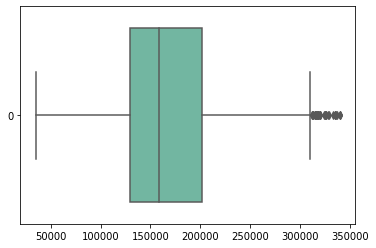

In [49]:
sns.boxplot(data=data_pairplot.SalePrice, orient="h", palette="Set2")

In [50]:
data_pairplot.corr()

,SalePrice,TotalArea,OverallQual,Bathrooms
SalePrice,1.000000,0.807186,0.781815,0.601119
TotalArea,0.807186,1.000000,0.621111,0.650448
OverallQual,0.781815,0.621111,1.000000,0.552429
Bathrooms,0.601119,0.650448,0.552429,1.000000


In [51]:
obs_corr = data_pairplot['SalePrice'].corr(data_pairplot['Bathrooms'])
obs_corr

0.6011193093419799

# Statistical inference from the dataset

In [52]:
import scipy
from scipy.stats.stats import pearsonr
sp = data_pairplot['SalePrice']
br = data_pairplot['Bathrooms']
pearson_coefficient,p_value = pearsonr(sp,br)
print(pearson_coefficient)
print(p_value)

0.6011193093419802
7.397820264799716e-136


In [53]:
# As the P value is less than 0.05, we reject the null hypothesis. 
#Thererfore there is significance relationship between Price and No. of Bathrooms.

In [54]:
ta = data_pairplot['TotalArea']
pearson_coefficient,p_value = pearsonr(sp,ta)
print(pearson_coefficient)
print(p_value)

0.8071862950678779
1.2751432e-316


In [55]:
# As the P value is less than 0.05, we reject the null hypothesis. 
#Thererfore there is significance relationship between Price and Total Area.

In [56]:
oq = data_pairplot['OverallQual']
pearson_coefficient,p_value = pearsonr(sp,oq)
print(pearson_coefficient)
print(p_value)

0.7818153319528443
5.751644068208216e-284


In [57]:
# As the P value is less than 0.05, we reject the null hypothesis. 
#Thererfore there is significance relationship between Price and Overall quality.

In [58]:
sp = c_train_set['SalePrice']
spr = c_train_set['3SsnPorch']
pearson_coefficient,p_value = pearsonr(sp,spr)
print(pearson_coefficient)
print(p_value)

0.04458366533574841
0.08858170358062883


In [59]:
# As the P value is greater than 0.05, we accept the null hypothesis. 
# Thererfore there is no significance relationship between Price and 3SsnPorch.

In [60]:
bdrooms_3 = c_train_set[c_train_set['BedroomAbvGr'] > 4]
sp = bdrooms_3['SalePrice']
bedrooms = bdrooms_3['BedroomAbvGr']
pearson_coefficient,p_value = pearsonr(sp,bedrooms)
print(pearson_coefficient)
print(p_value)

-0.10314231423494306
0.5944284218885458


In [61]:
overall_set.BldgType = overall_set.BldgType.astype('category')

In [62]:
Categorical_dtypes = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [63]:
for s in Categorical_dtypes:
    overall_set[s] = overall_set[s].astype('category')

In [64]:
overall_set['MoSold'] = overall_set['MoSold'].astype(str)
overall_set['YrSold'] = overall_set['YrSold'].astype(str)

In [65]:
cb=pd.get_dummies(overall_set)
print("the shape of the original dataset",overall_set.shape)
print("the shape of the encoded dataset",cb.shape)
print("We have ",cb.shape[1]- overall_set.shape[1], 'new encoded features')

the shape of the original dataset (2919, 79)
the shape of the encoded dataset (2919, 322)
We have  243 new encoded features


In [66]:
Train = cb[:1460]
Test = cb[1460:]

In [67]:
Train.shape

(1460, 322)

In [68]:
Test.shape

(1459, 322)

In [69]:
# Removing outliers from Sale Price column
Train = remove_outliers('GrLivArea',Train)

In [70]:
Train = remove_outliers('MasVnrArea',Train)

In [71]:
Train = remove_outliers('TotalBsmtSF',Train)
Train = remove_outliers('1stFlrSF',Train)
Train = remove_outliers('GarageArea',Train)

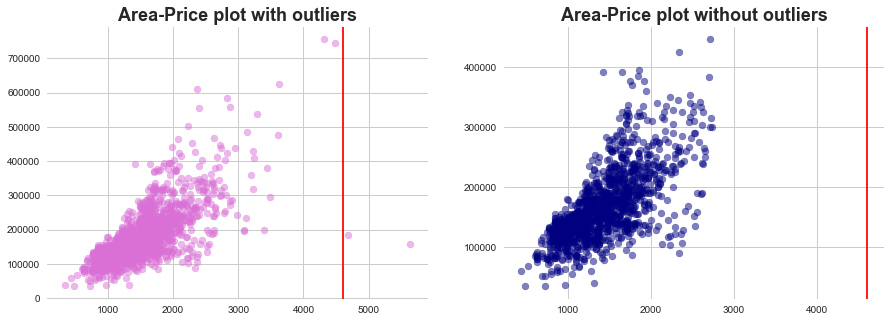

In [72]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=train_set['GrLivArea'], y=train_set['SalePrice'], color=('orchid'), alpha=0.5)
plt.title('Area-Price plot with outliers',weight='bold', fontsize=18)
plt.axvline(x=4600, color='r', linestyle='-')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.scatter(x=Train['GrLivArea'], y=Train['SalePrice'], color='navy', alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Area-Price plot without outliers',weight='bold', fontsize=18)
plt.show()

In [73]:
print("Skewness before log transform: ", train_set['SalePrice'].skew())
print("Kurtosis before log transform: ",train_set['SalePrice'].kurt())

Skewness before log transform:  1.8828757597682129
Kurtosis before log transform:  6.536281860064529


In [74]:
#log transform the target:
Train["SalePrice"] = np.log1p(Train["SalePrice"])

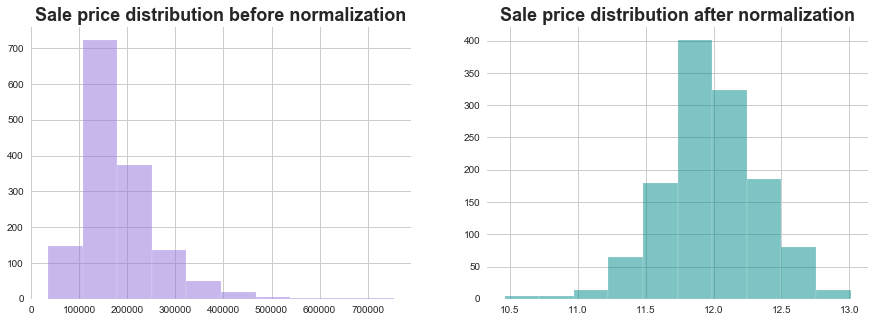

In [75]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(train_set.SalePrice, bins=10, color='mediumpurple',alpha=0.5)
plt.title('Sale price distribution before normalization',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(Train.SalePrice, bins=10, color='darkcyan',alpha=0.5)
plt.title('Sale price distribution after normalization',weight='bold', fontsize=18)
plt.show()

In [76]:
print("Skewness before log transform: ", Train['SalePrice'].skew())
print("Kurtosis before log transform: ",Train['SalePrice'].kurt())

Skewness before log transform:  -0.20731717368355146
Kurtosis before log transform:  0.8172778317959479


# Machine Learning:

In [77]:
y = Train['SalePrice']
x = Train.drop(['SalePrice'],axis = 1)

In [78]:
Test = Test.drop(['SalePrice'],axis = 1)

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)

In [125]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)
X_test = scaler.transform(Test)

# Modelling using Linear Regression

In [141]:
## import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lr=LinearRegression(fit_intercept=False)
lr.fit(x_train,y_train)
lr_reg_pred = lr.predict(x_test)
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, lr_reg_pred))))
print('Root Mean Square Error test = ' + str(r2_score(y_test, lr_reg_pred)))

Root Mean Square Error test = 0.15458977678184954
Root Mean Square Error test = 0.786592584710104


# Modelling using Ridge Regression

In [127]:
## import sklearn.model_selection as ms
import sklearn.model_selection as GridSearchCV
import sklearn.model_selection as RandomizedSearchCV
import sklearn.model_selection as ms
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters,scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved is: ",np.sqrt(-ridge_reg.best_score_))
ridge_pred=np.sqrt(-ridge_reg.best_score_)

The best value of Alpha is:  {'alpha': 6}
The best score achieved is:  0.12474845524250168


In [128]:
ridge_mod=Ridge(alpha=12)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

Root Mean Square Error train = 0.09614497041716968
Root Mean Square Error test = 0.10262248582082446


# Modelling using Bayesian Ridge Regression

In [129]:
## import sklearn.model_selection as ms
import sklearn.model_selection as GridSearchCV
import sklearn.model_selection as ms
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
bs_ridge=BayesianRidge()
bs_ridge.fit(x_train,y_train)
y_pred_train=bs_ridge.predict(x_train)
y_pred_test=bs_ridge.predict(x_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

Root Mean Square Error train = 0.09179529659320593
Root Mean Square Error test = 0.10356471952057074


# Modelling using Kernel Ridge

In [130]:
from sklearn.kernel_ridge import KernelRidge
kr_ridge = KernelRidge()
kr_ridge.fit(x_train, y_train)
y_pred_train=kr_ridge.predict(x_train)
y_pred_test=kr_ridge.predict(x_test)
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

Root Mean Square Error train = 0.10649124605877298
Root Mean Square Error test = 0.15274036057002346


# Modelling using PolynomialFeatures

In [85]:
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression
#from sklearn.pipeline import Pipeline
#poly = PolynomialFeatures(degree=2)
#x_train = poly.fit_transform(x_train)
#x_test = poly.fit_transform(x_test)
#model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
#model.fit(x_train,y_train)

# Modelling using Lasso Regression

In [86]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(x_train,y_train)

print('The best value of Alpha is: ',lasso_reg.best_params_)

C:\Users\sasi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.40652479524884466, tolerance: 0.009072436680973463
  positive)
C:\Users\sasi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3540643484868884, tolerance: 0.009136196606176246
  positive)
C:\Users\sasi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.039106378238324524, tolerance: 0.009276342248570182
  positive)
C:\Users\sasi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

The best value of Alpha is:  {'alpha': 0.0009}


C:\Users\sasi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.40798629123459307, tolerance: 0.01138761366436263
  positive)


In [87]:
lasso_reg=Lasso(alpha=0.0009)
lasso_reg.fit(x_train,y_train)
y_lasso_train=lasso_reg.predict(x_train)
y_lasso_test=lasso_reg.predict(x_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_lasso_test))))

Root Mean Square Error train = 0.10070391522380252
Root Mean Square Error test = 0.10753823555913171


C:\Users\sasi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.40798629123459307, tolerance: 0.01138761366436263
  positive)


In [88]:
y_lasso_output=lasso_reg.predict(X_test)

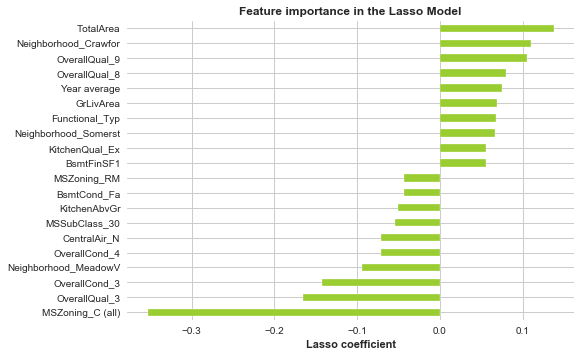

In [89]:
coefs = pd.Series(lasso_reg.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

# Modelling using Elastic Net Regression

In [90]:
from sklearn.linear_model import ElasticNetCV

alphas = [10,1,0.1,0.01,0.001,0.002,0.003,0.004,0.005,0.00054255]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)

print('Root Mean Square Error test b= ' + str(np.sqrt(mean_squared_error(y_test, ela_pred))))
print(elastic_cv.alpha_)

Root Mean Square Error test b= 0.1048597578595954
0.00054255


# Modelling using KNN Regressor

In [91]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=9)
neigh.fit(x_train, y_train)
knn_pred = neigh.predict(x_test)
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, knn_pred))))

Root Mean Square Error test = 0.1967749649680163


# Modelling using Decision Tree Regressor

In [92]:
from sklearn import tree
dec_clf = tree.DecisionTreeRegressor()
dec_clf = dec_clf.fit(x_train, y_train)
dec_pred = dec_clf.predict(x_test)
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, dec_pred))))

Root Mean Square Error test = 0.21412609482253692


# Modelling using SVM Regressor

In [93]:
from sklearn.svm import SVR
svr_clf = SVR(C=1.0, epsilon=0.2)
svr_clf = svr_clf.fit(x_train, y_train)
svr_pred = svr_clf.predict(x_test)
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, svr_pred))))

C:\Users\sasi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Root Mean Square Error test = 0.18926939652056016


# Modelling using Ada Boost

In [94]:
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor(base_estimator=XGBRegressor(verbosity=0))
ada_boost.fit(x_train, y_train)
ada_pred = ada_boost.predict(x_test)
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, ada_boost.predict(x_train)))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, ada_pred))))

Root Mean Square Error train = 0.007560667126743286
Root Mean Square Error test = 0.10916591565705952


# Modelling using Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, rf_model.predict(x_train)))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, rf_pred))))

C:\Users\sasi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Root Mean Square Error train = 0.06461989752869243
Root Mean Square Error test = 0.13500069357231256


# Modelling using GradientBoostingRegressor

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)
gb_pred = gb_model.predict(x_test)
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, gb_model.predict(x_train)))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, gb_pred))))

Root Mean Square Error train = 0.0691108115186292
Root Mean Square Error test = 0.1164456931358649


# Modelling using GradientBoostingRegressor

In [97]:
import xgboost
xgb_model = xgboost.XGBRegressor()
xgb_model.fit(x_train,y_train)
xgb_pred = xgb_model.predict(x_test)
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, xgb_model.predict(x_train)))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, xgb_pred))))

Root Mean Square Error train = 0.004922617137725648
Root Mean Square Error test = 0.12578643582373575


In [98]:
import xgboost
xgb_model = xgboost.XGBRegressor()

In [99]:
booster = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]
n_estimators = [100,500,900,1100,1500]
max_depth = [2,3,5,10,15]
learning_rate = [0.05,0.1,0.15,0.2]
min_child_weight = [1,2,3,4]
hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    
}

In [100]:
random_cv = ms.RandomizedSearchCV(estimator = xgb_model,param_distributions = hyperparameter_grid,cv = 5,n_iter = 50,
                               scoring = 'neg_mean_absolute_error',n_jobs = 4,verbose = 5,return_train_score = True,random_state = 21)

In [101]:
#random_cv.fit(x_train,y_train)

In [102]:
#random_cv.best_estimator_

In [104]:
# xgb_model = xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             #colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             #importance_type='gain', interaction_constraints=None,
             #learning_rate=0.05, max_delta_step=0, max_depth=3,
             #min_child_weight=1, monotone_constraints=None,
             #n_estimators=1100, n_jobs=0, num_parallel_tree=1,
             #objective='reg:squarederror', random_state=0, reg_alpha=0,
             #reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             #validate_parameters=False, verbosity=None)

In [ ]:
#xgb_model.fit(x_train,y_train)

In [ ]:
#xgb_pred = xgb_model.predict(x_test)
#print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, xgb_model.predict(x_train)))))
#print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, xgb_pred))))

# Testing the Test data with the best model

In [136]:
bs_model_output=bs_ridge.predict(X_test)
predictions = np.expm1(bs_model_output)

In [138]:
import pickle
filename = 'finalmodel.pkl'
pickle.dump(bs_ridge,open(filename,'wb'))

# Submitting the Predited Test results to the sample_submission.csv file

In [139]:
pred = pd.DataFrame(predictions)
sub_df = pd.read_csv(r'C:\Users\sasi\Downloads\house-prices-advanced-regression-techniques\sample_submission.csv',encoding = 'utf-8')
datasets = pd.concat([sub_df['Id'],pred],axis =1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv(r'C:\Users\sasi\Downloads\house-prices-advanced-regression-techniques\sample_submission.csv',encoding = 'utf-8',index = False)

# The best RMSE obtained is 0.130 using Bayesian Ridge Model.